In [9]:
import numpy as np
import pandas as pd
from matplotlib import cm 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib notebook

In [2]:
D = 2
cf_num = 10
search_range = [-100, 100]

In [3]:
shift_data = np.loadtxt(fname = 'shift_data.txt')
M_D2 = np.loadtxt(fname = 'M_D2.txt').reshape((cf_num, D, D))
M1 = M_D2[0].reshape((-1))
o = shift_data.reshape((-1))[:cf_num*D]

## Sphere

In [4]:
def shift_sphere(x, y, o, bias = -1400):
    return (x - o[0]) ** 2 + (y - o[1]) ** 2 + bias

In [5]:
x = np.linspace(-100, 100, 20)
y = np.linspace(-100, 100, 20)

In [6]:
X, Y = np.meshgrid(x, y)

In [7]:
Z = shift_sphere(X, Y, o)

<IPython.core.display.Javascript object>


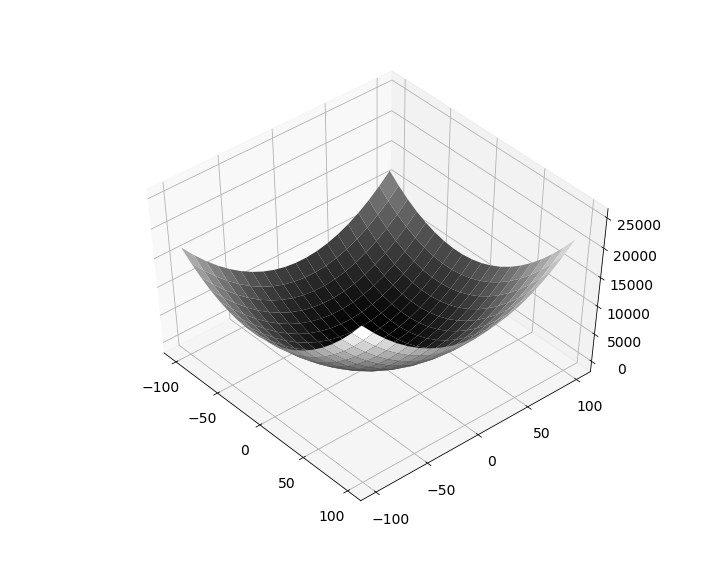

In [10]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.gist_gray, linewidth = 1, antialiased = True)
ax.tick_params(labelsize = 14, pad = 10)
plt.xticks([-100, -50, 0, 50, 100])
plt.yticks([-100, -50, 0, 50, 100])
ax.set_zticks([0, 5000, 10000, 15000, 20000, 25000])
plt.show()

In [11]:
plt.savefig('sphere.eps', bbox_inches = 'tight')

## Rotated Rosenbrock

In [82]:
def rotated_rosenbrock(x, y, o, M1, a = 1, b = 100, bias = -900):
    xshift = 2.048/100*(x - o[0])
    yshift = 2.048/100*(y - o[1])
    xrot = xshift * M1[0] + yshift * M1[1] + 1
    yrot = xshift * M1[2] + yshift * M1[3] + 1
    z = (a-xrot)**2 + b*(xrot**2-yrot)**2 + bias
    return z

In [95]:
x = np.linspace(-100, 100, 20)
y = np.linspace(-100, 100, 20)

In [96]:
X, Y = np.meshgrid(x, y)

In [97]:
Z = rotated_rosenbrock(X, Y, o, M1)

<IPython.core.display.Javascript object>


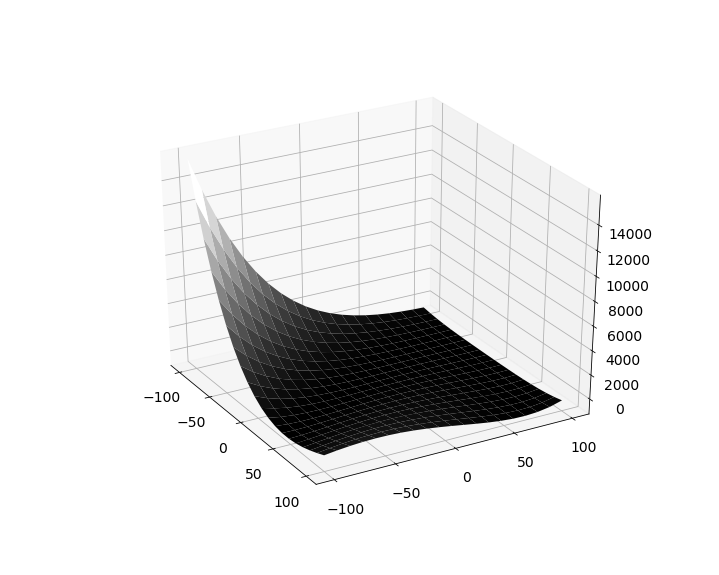

In [122]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap = cm.gray, linewidth = 1, antialiased = True)
ax.tick_params(labelsize = 14, pad = 10)
plt.xticks([-100, -50, 0, 50, 100])
plt.yticks([-100, -50, 0, 50, 100])
plt.show()

In [123]:
plt.savefig('rosenbrock.eps', bbox_inches = 'tight', dpi = 300)